In [5]:
# First we need to import all of the packages we will be using!
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from decimal import Decimal

In [6]:
#simple caspase model with feedback and FLIP
# Our "states" list has the state variables in the following order:
# proC8, C8, proC3, C3, R, F, RF
def caspase_FLIP_model(states,t):
    proC8 = states[0]
    C8 = states[1]
    proC3 = states[2]
    C3 = states[3]
    R = states[4]
    F = states[5]
    RF = states[6]
   
    proC8prime = -k_a*C3*proC8 + QC8 - delta*proC8 - k_ba*proC8*R
    C8prime = k_a*C3*proC8 - delta*C8 + k_ba*proC8*R
    proC3prime = -k_a*C8*proC3 + QC3 - delta*proC3
    C3prime = k_a*C8*proC3 - delta*C3
    Rprime = - kp*F*R + km*RF
    Fprime = - kp*F*R + km*RF
    RFprime = kp*F*R - km*RF
    
    statesprime = [proC8prime,C8prime,proC3prime,C3prime,Rprime,Fprime,RFprime]
    return statesprime

In [7]:
# Default mean model values

#INITIAL CONDITIONS
proC8_0 = 1
C8_0 = 0
proC3_0 = 1
C3_0 = 0
R_0 = 1
F_0 = 1
RF_0 = 0

#parameters
k_a = 0.001
k_ba = 0.001
kp = 0.01
km = 0.01
delta = 2e-4

threshold = 0.610718


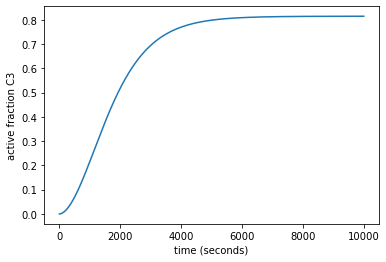

In [8]:
# Simulation with default mean parameters

QC8 = proC8_0*delta
QC3 = proC3_0*delta
states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]

t = np.linspace(0,10000,1000)
solution = odeint(caspase_FLIP_model,states0,t)
plt.plot(t, solution[:, 3])
plt.xlabel("time (seconds)")
plt.ylabel("active fraction C3")

#Assuming the default mean model parameters corresponds to a cell that dies
#we use the steady state value of active fraction C3 as an approximate threshold
ss_C3 = solution[999, 3]/proC3_0
factor = 0.75
threshold = factor*ss_C3
print("threshold = %f" %threshold)

In [17]:
# STEADY-STATE responses - vary single parameter

#param is the parameter that we want to be sampled
# MAKE SURE TO RESET DEFAULT MEAN PARAMETER VALUES PRIOR TO EACH RUN (rerun cell # Default mean model values)

# first specify the default mean value of param

###
mean_param_val = k_a  #you need to modify this value to match the mean default value of param
###

sd_param_val = 1 #we will assume the standard deviation is 1 for all parameters

# we will need to convert the mean of the log-normal dist to that of the underlying normal dist
mean_param_val = np.log(mean_param_val)-0.5*(sd_param_val**2)

# Now we can sample the parameter distribution:
param_values = np.random.lognormal(mean=mean_param_val, sigma=sd_param_val, size=500)

#These will be the list that hold the steady state (ss) results
ss_results = []

for param in param_values:
    # define which variable is being specified by param
    
    ###
     k_a = param  #write in the name of param to the left; MAKE SURE IT EXACTLY MATCHES THE NAME GIVEN IN THE MODEL
    ###
    
    # next we create our initial conditions
    states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]
    QC8 = proC8_0*delta
    QC3 = proC3_0*delta
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_FLIP_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our saved results
    ss_results.append(norm_C3)

plt.figure(figsize=(10, 15))

# plotting parameter distribution that was sampled
plt.subplot(3, 1, 1)
x = np.linspace(min(param_values), max(param_values), 10000)
pdf = np.exp(-(np.log(x) - mean_param_val)**2 / (2 * sd_param_val**2))/ (x * sd_param_val * np.sqrt(2 * np.pi))
plt.plot(np.insert(x, 0, 0), np.insert(pdf, 0, 0),lw=3)
plt.ylabel('density')
plt.xlabel('parameter distribution')

# plotting resulting distribution of active caspase 3
plt.subplot(3, 1, 2)
plt.hist(ss_results, bins=np.arange(0, 1, 0.1))
plt.xlabel("population distribution of active fraction caspase 3")

# plotting sampled parameter values vs active caspase 3
plt.subplot(3, 1, 3)
plt.scatter(param_values,ss_results)
plt.plot([min(x), max(x)], [threshold, threshold], color='r', label='threshold')
plt.ylim([0, 1])
plt.xlabel('sampled parameter values')
plt.ylabel('Active Fraction Caspase 3')
plt.legend()
plt.show()

# Determine fraction of population that dies
print("threshold = %f" %threshold)
print("Fraction of cells in population that dies = %f" % (sum(np.array(ss_results)>=threshold)/len(ss_results)))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 31)

threshold = 0.610718
Fraction of cells in population that died = 0.752000


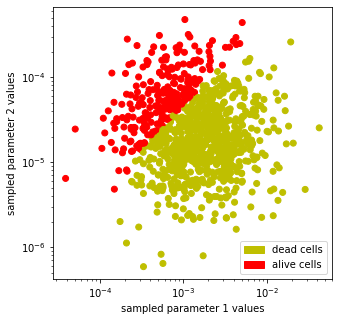

In [22]:
# STEADY-STATE responses - vary two parameters

#param1 and param2 are the parameters that we want to sample
# MAKE SURE TO RESET DEFAULT MEAN PARAMETER VALUES PRIOR TO EACH RUN

# first specify the default mean value of param1
###
mean_param1_val = k_a #you need to modify this value to match the mean default value of param1
###

sd_param1_val = 1 #we will assume the standard deviation is 1 for all parameters

# next specify the default mean value of param2
###
mean_param2_val = delta #you need to modify this value to match the mean default value of param2
###

sd_param2_val = 1 #we will assume the standard deviation is 1 for all parameters

# we will need to convert the mean of the log-normal dist to that of the underlying normal dist
mean_param1_val = np.log(mean_param1_val)-0.5*(sd_param1_val**2)
mean_param2_val = np.log(mean_param2_val)-0.5*(sd_param2_val**2)

# Now we can sample the parameter distributions:
param1_values = np.random.lognormal(mean=mean_param1_val, sigma=sd_param1_val, size=1000)
param2_values = np.random.lognormal(mean=mean_param2_val, sigma=sd_param2_val, size=1000)

#These will be the list that hold the steady state (ss) results
ss_results = []

for i in range(len(param1_values)):
    # define which variable is being specified by param1 and param2
    ###
    k_a = param1_values[i] #write in the name of param1 to the left; MAKE SURE IT EXACTLY MATCHES THE NAME GIVEN IN THE MODEL
    delta = param2_values[i] #write in the name of param2 to the left; MAKE SURE IT EXACTLY MATCHES THE NAME GIVEN IN THE MODEL
    ###
    
    # next we create our initial conditions
    states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]
    QC8 = proC8_0*delta
    QC3 = proC3_0*delta
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_FLIP_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our saved results
    ss_results.append(norm_C3)
    
plt.figure(figsize=(5, 5))
cm = mcolors.ListedColormap(['y', 'r'])
sc = plt.scatter(param1_values,param2_values, c=ss_results< threshold, cmap = cm)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('sampled parameter 1 values')
plt.ylabel('sampled parameter 2 values')
dead = mpatches.Patch(color='y', label='dead cells')
alive = mpatches.Patch(color='r', label='alive cells')
plt.legend(handles=[dead, alive])

print("threshold = %f" %threshold)
print("Fraction of cells in population that died = %f" % (sum(np.array(ss_results) >= threshold)/len(ss_results)))

In [14]:
# STEADY-STATE responses - vary all parameters

# MAKE SURE TO RESET DEFAULT MEAN PARAMETER VALUES PRIOR TO EACH RUN

model_parameters = [k_a, k_ba, kp, km, delta, proC8_0, proC3_0, R_0, F_0]

sampled_parameters = np.zeros((len(model_parameters), 1000))

for i in range(len(model_parameters)):
    mean_param_val = model_parameters[i]
    # we will need to convert the mean of the log-normal dist to that of the underlying normal dist
    mean_param_val = np.log(mean_param_val)-0.5*(sd_param1_val**2)
    sd_param_val = 1 #we will assume the standard deviation is 1 for all parameters
    # Now we can sample the parameter distributions:
    param_values = np.random.lognormal(mean=mean_param_val, sigma=sd_param_val, size=1000)
    sampled_parameters[i, :] = param_values

#These will be the list that hold the steady state (ss) results
ss_results = []

for i in range(1000):
    # define which variables are being specified by sampled_parameters
    k_a = sampled_parameters[0, i]
    k_ba = sampled_parameters[1, i]
    kp = sampled_parameters[2, i]
    km = sampled_parameters[3, i]
    delta = sampled_parameters[4, i]
    proC8_0 = sampled_parameters[5, i]
    proC3_0 = sampled_parameters[6, i]
    R_0 = sampled_parameters[7, i]
    F_0 = sampled_parameters[8, i]
    
    # next we create our initial conditions
    states0 = [proC8_0,C8_0,proC3_0,C3_0,R_0,F_0,RF_0]
    QC8 = proC8_0*delta
    QC3 = proC3_0*delta
    
    # To intgrate ODEs, we need a "t" vector for time
    t = np.linspace(0,100000,1000)
    # Now, integrate the ODEs and put the results in "solution"
    solution = odeint(caspase_FLIP_model,states0,t)
    # Now, calculate our steady state output, C3/proc3_0
    # (the concentration of cleaved caspase 3 divided by the total initial concentration of pro-caspase 3)
    norm_C3 = solution[999,3]/proC3_0
    # Append this result to the vector of our saved results
    ss_results.append(norm_C3)

print("threshold = %f" %threshold)
print("Fraction of cells in population that survive = %f" % (sum(np.array(ss_results) < threshold)/len(ss_results)))

threshold = 0.610718
Fraction of cells in population that survive = 0.148000


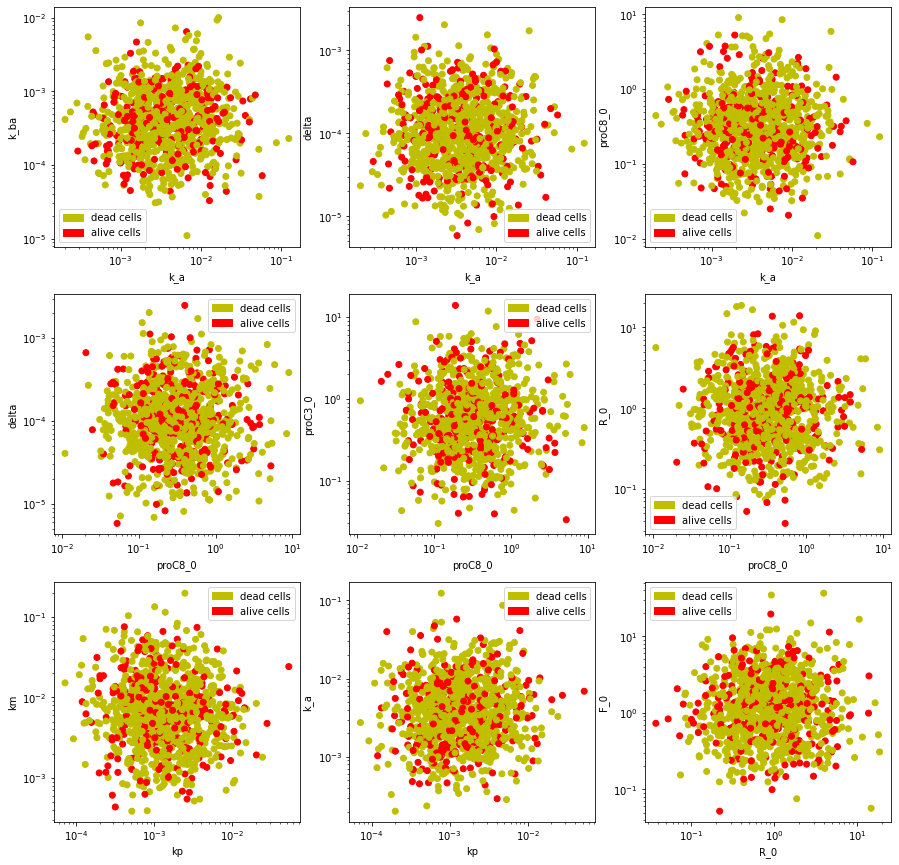

In [23]:
# Plotting Parameter Pairs
model_parameters = ['k_a', 'k_ba', 'kp', 'km', 'delta', 'proC8_0', 'proC3_0', 'R_0', 'F_0']
#the following are indices of pair of parameters we will explore for correlation
correlations = [[0, 1], [0, 4], [0, 5], [5, 4], [5, 6], [5, 7], [2, 3], [2, 0], [7, 8]] 

plt.figure(figsize=(15, 15))
for i in range(len(correlations)):
    plt.subplot(3, 3, i+1)
    param1 = correlations[i][0]
    param2 = correlations[i][1]
    param1_values = sampled_parameters[param1, :]
    param2_values = sampled_parameters[param2, :]
    cm = mcolors.ListedColormap(['y', 'r'])
    sc = plt.scatter(param1_values,param2_values, c=ss_results< threshold, cmap = cm)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(model_parameters[param1])
    plt.ylabel(model_parameters[param2])
    dead = mpatches.Patch(color='y', label='dead cells')
    alive = mpatches.Patch(color='r', label='alive cells')
    plt.legend(handles=[dead, alive])